### -  Selenium을 활용한 이미지 크롤링
- 유투브 영상을 이미지로 크롤링
- 특정 영역(Element)를 자르기
    - pillow: python을 이용해서 이미지를 전처리해주는 대표적인 패키지
- 유투브 영상 데이터 다운로드
- fake_useragent 사용법
- headless 설정
    - 브라우저를 화면에 띄우지 않고 RAM영역에만 띄워 사용하는 방법
    - 서버에서 Selenium을 이용해 크롤링 할 때 사용

In [1]:
%run C://Users/HSS/dd.py

In [2]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from PIL import Image as pil
import requests
import time

### 1. 이미지 스크린샷


In [34]:
url = 'https://www.youtube.com/watch?v=SN3owLJxG24&t=437s'
driver.get(url)

## 광고
time.sleep(3)
print('now sleep 3s')
try:
    driver.find_element_by_css_selector('paper-button#button.style-scope.ytd-button-renderer.style-blue-text.size-default').click()

except NoSuchElementException:
    time.sleep(10)
    print('now sleep 10s')

#     driver.quit()

now sleep 3s
now sleep 10s


In [24]:
url = 'https://www.youtube.com/watch?v=SN3owLJxG24&t=437s'
driver = webdriver.Chrome()
driver.get(url)
driver.save_screenshot('thumbnail/screenshot.png')

pil_img = pil.open('thumbnail/screenshot.png')

driver.quit()


now sleep 3s


TypeError: catching classes that do not inherit from BaseException is not allowed

In [17]:
driver.find_element_by_css_selector('button.ytp-ad-skip-button.ytp-button').click()
time.sleep(5)
driver.quit()

In [10]:
driver.save_screenshot('thumbnail/screenshot.png')
driver.quit()

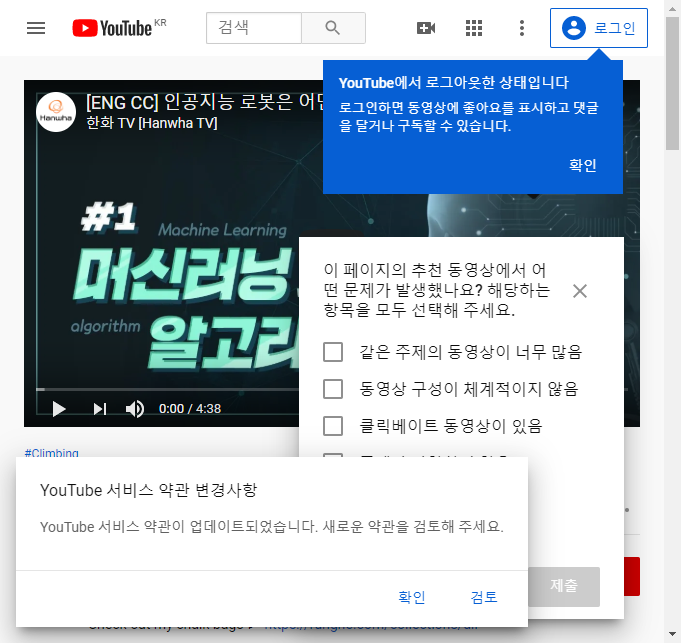

In [12]:
pil_img = pil.open('thumbnail/screenshot.png')
pil_img

#### [Error 1] 깔끔한 스크린샷이 안나왔다. 버튼 + 광고..

- 광고와 온갖 버튼들이 불규칙적으로 (뜰때 있고 안 뜰때 있음) 나와서 NoSuchElementException에 걸리고 크롬 중단 발생
- `try/except` 와 `time.sleep()`으로 해결해보려함

now sleep 3s
now sleep 10s
광고가 없다
찰칵


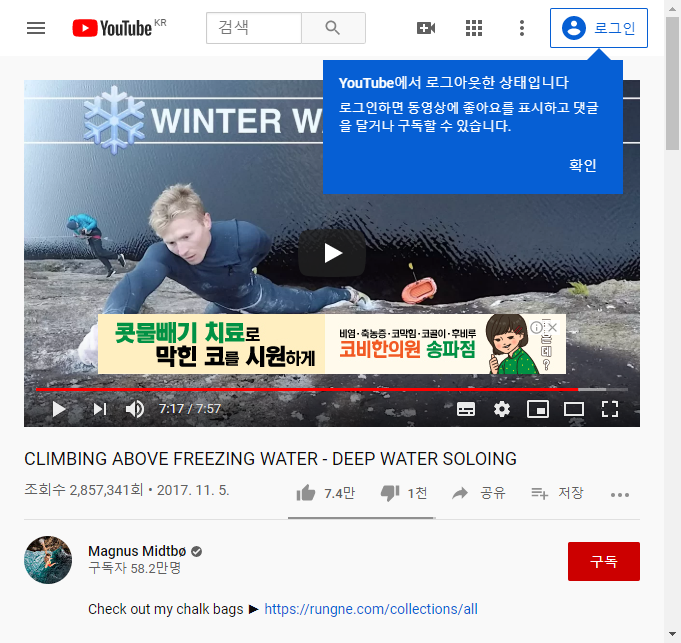

In [42]:
url = 'https://www.youtube.com/watch?v=SN3owLJxG24&t=437s'
driver = webdriver.Chrome()
driver.get(url)

## 광고
time.sleep(3)
print('now sleep 3s')
try:
    #바뀐 정책 확인 버튼
    driver.find_element_by_css_selector('paper-button#button.style-scope.ytd-button-renderer.style-blue-text.size-default').click()
    time.sleep(5)

except NoSuchElementException:
    time.sleep(10)
    print('now sleep 10s')

# 광고가 안나온 경우 
try:
    driver.find_element_by_css_selector('button.ytp-ad-skip-button.ytp-button').click()
    print('광고skip 클릭')
    driver.save_screenshot('thumbnail/screenshot.png')
    print('찰칵')

except NoSuchElementException: 
    print('광고가 없다')
    driver.save_screenshot('thumbnail/screenshot.png')
    print('찰칵')
    driver.quit()

pil_img = pil.open('thumbnail/screenshot.png')
pil_img

### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [43]:
driver = webdriver.Chrome()
driver.get(url)

In [46]:
element = driver.find_element_by_css_selector('#movie_player')

# 엘리먼트를 지정하고 엘리먼트의 위치와 사이즈를 반환
# 왼쪽 상단을 원점으로 한다

location = element.location
size = element.size
print(location, size)

{'x': 24, 'y': 80} {'width': 744, 'height': 419}


In [54]:
# AREA 변경: 해상도에 따라 비율이 달라짐.

left = location['x'] * 0.8
top = location['y'] * 0.8
right = left + size['width'] * 0.8
bottom = top + size['height'] * 0.8

area = (left,top,right,bottom)
area

(19.200000000000003, 64.0, 614.4000000000001, 399.20000000000005)

### 3. 이미지를 pillow로 자르기

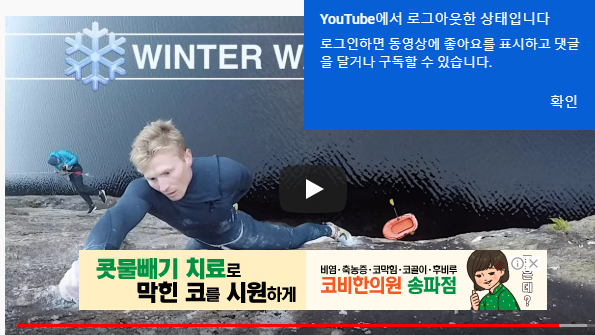

In [53]:
pil_element = pil_img.crop(area)
pil_element


#이밎

In [55]:
pil_element.save('thumbnail/screenshot_crop.png')

#### 썸네일 만들기
- 원본 이미지를 다양한 사이즈(용량)로 축소하는 방법

In [56]:
pil_element.size

(595, 335)

(302, 170)


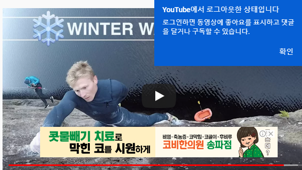

In [57]:
pil_element.thumbnail((320,170))
print(pil_element.size)
pil_element

### 2. Fake agent와 Headless

#### Fakeagent

In [61]:
from fake_useragent import UserAgent

In [96]:
#useragent는 자바스크립트로 확인 가능
driver = webdriver.Chrome()
agent = driver.execute_script('return navigator.userAgent;')
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36


In [118]:
UserAgent().chrome

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17'

In [120]:
#User agent 설정
options = webdriver.ChromeOptions()
options.add_argument('user-agent={}'.format(UserAgent().chrome))

#useragent는 자바스크립트로 확인 가능
driver = webdriver.Chrome(options = options)
agent = driver.execute_script('return navigator.userAgent;')
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2226.0 Safari/537.36


#### headless
- 브라우저를 화면에 띄우지 않고 메모리 상에서 실행하는 방법
- window 화면이 지원되지 않는 환경에서 사용

In [126]:
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(options = options)

driver.get('https://naver.com')
print(driver.title)
driver.quit()

NAVER


### 영상 파일 다운로드
- www.을 ss로 변경하면 다운로드받을 수 있는 사이트로 접속한다

In [135]:
def download(title, link):
    response = requests.get(link, stream = True)
    save_path, size = 'thumbnail/{}'.format(title), 0
    with open(save_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size = 1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [136]:
url = 'https://www.youtube.com/watch?v=D_EnyikMsEU'
url.replace('www.','ss')

'https://ssyoutube.com/watch?v=D_EnyikMsEU'

In [137]:
link = 'https://r4---sn-n3cgv5qc5oq-bh2ek.googlevideo.com/videoplayback?expire=1582798065&ei=kUBXXp3AHJOmxwKQh5qoBQ&ip=175.120.209.32&id=o-ALt9iaiRjqQn8tCgXlwbhQ__Ky9VQ51MOt0bxlRa4CN_&itag=18&source=youtube&requiressl=yes&mm=31%2C26&mn=sn-n3cgv5qc5oq-bh2ek%2Csn-i3belne6&ms=au%2Conr&mv=m&mvi=3&pl=20&gcr=kr&initcwndbps=2122500&vprv=1&mime=video%2Fmp4&gir=yes&clen=4859662&ratebypass=yes&dur=196.719&lmt=1574666313457633&mt=1582776397&fvip=4&fexp=23842630&c=WEB&txp=5531432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cgcr%2Cvprv%2Cmime%2Cgir%2Cclen%2Cratebypass%2Cdur%2Clmt&lsparams=mm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AHylml4wRAIgDGkB5ZaMpeHry27fHzCd4IRwbYEdgDQX1Ud-rCHcppoCIA7rvS7teBEDSTA-6VTxqKoHtYzNC7u_zMclTqjWProw&sig=ALgxI2wwRAIgbGzCp-oZCefqcMIbo_nA7YyGhD0o80nMyakEsO58eXoCIHYT9p2vVDO-LfglCQ7mp_IX0ezwV2tp6uo_q4-1Maug&video_id=D_EnyikMsEU&title=Madeon+-+No+Fear+No+More+%28Official+Audio%29'

In [139]:
title = 'Madeon - No Fear No More (Official Audio).mp4'
size = download(title, link)
print('{}Mb'.format(round(size/1024/1024)))

5Mb
